In [29]:
import sys
sys.path.append("..")
import json
import numpy as np
import random
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import csv

In [44]:
target_values = [1, 0, 1, 1, 1, 0.95, 0.99]
count_violations = np.zeros((128),dtype = int)

priority_list = []
with open("priority_list.csv") as csvfile:
    csv_file = csv.reader(csvfile)
    for row in csv_file:
        priority_list.append(row)
    priority_list = [[float(x) for x in row] for row in priority_list]
priority_list = np.array(priority_list)

# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd(), "..")) + "/2020_12_01_NSGA_II_results_10000"
# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd(), "..")) + "/2020_12_26_Random_results_20000"
file_folder_orgin = os.path.abspath(os.path.join(os.getcwd())) + "/2020_12_26_NSGA_III_results_20000"
result_list = []
fileList = os.listdir(file_folder_orgin)
fileList.sort()
for i in range(len(fileList)):
    textname = file_folder_orgin + '/' + fileList[i]
    result = np.loadtxt(textname)
    violation_pattern = np.zeros((7), dtype = int)
    result_list.append(result)
    for j in range(len(violation_pattern)):
        if result[j] < target_values[j]:
            violation_pattern[j] = 1
        else:
            violation_pattern[j] = 0
    flag = 0
    for j in range (priority_list.shape[0]):
        if (np.array(violation_pattern) == priority_list[j]).all():
            flag = 1
            count_violations[j] += 1
            break
    if flag == 0:
        print(violation_pattern)
print(count_violations, count_violations.sum(), np.array(result_list).shape[0])

[   0    0    0    0    0    5    0    0    0    0    0    0    0    0
    0    1   19    0   39    0  223   38    0    0    0    0   28    0
    1    0    0    0    0    0    0    0    0   45    0    0    0    0
    0    0    0    0    0    0    3    0    3    0    4    4    0    0
    0    0    3    0    0    1    0    0    0    0    0    0    0  597
  428    0    0 1735    0    0    0    0    0 1364  600  266 1677    0
 2955  714    0    1    0    0 1316  120  131  256    0  232    0    0
    0    0    0  801   14    0    0   68    0    0    0    0    0   18
  809   72 1547   28 1661  192    0    0    4   10 1644   58   62   71
    1  131] 20000 20000


In [45]:
criticality = 0
for i in range(len(count_violations)):
    criticality += count_violations[i] * (127-i)/127
    
print(criticality/count_violations.sum())

category = 0
for i in range(len(count_violations)):
    if count_violations[i] > 0:
        category += 1

print(category, category/128)

0.2731488188976378
48 0.375


In [31]:
sns.set_style("darkgrid")
data_result = DataFrame(result_list)
data_result.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g'},inplace=True)#注意这里0和1都不是字符串
data_result.dropna(axis=0,how='any')

,a,b,c,d,e,f,g
0,1.0,3.510459,1.0,1.000000,1.000000,1.000000,0.999466
1,1.0,3.517229,1.0,1.000000,1.000000,0.972091,0.996034
2,1.0,3.500246,1.0,1.000000,1.000000,0.989235,0.999143
3,1.0,7.045747,1.0,1.000000,1.000000,1.000000,0.999150
4,1.0,3.501859,1.0,1.000000,1.000000,1.000000,0.999219
...,...,...,...,...,...,...,...
19995,1.0,-1.000000,1.0,0.000000,0.823529,0.767514,0.992303
19996,1.0,-1.000000,1.0,0.000000,0.096774,0.940144,0.993068
19997,1.0,-1.000000,1.0,1.000000,0.780488,0.942024,0.989425
19998,1.0,3.615754,1.0,0.000000,1.000000,0.950743,0.992262


/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='a'>

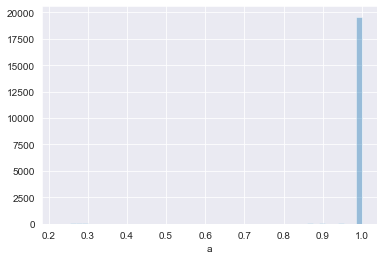

In [32]:
sns.distplot(data_result['a'],kde = False)

<AxesSubplot:xlabel='b'>

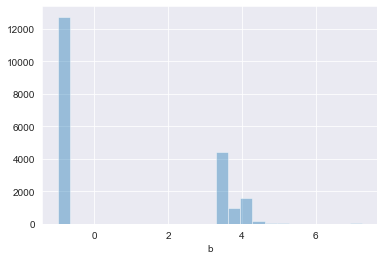

In [33]:
sns.distplot(data_result['b'],kde = False)

<AxesSubplot:xlabel='c'>

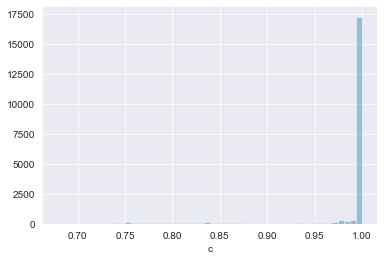

In [34]:
sns.distplot(data_result['c'],kde = False)

<AxesSubplot:xlabel='d'>

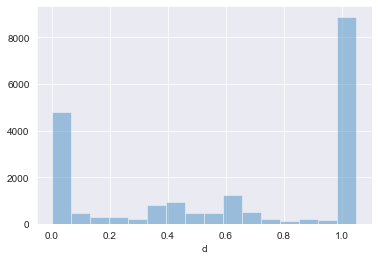

In [35]:
sns.distplot(data_result['d'],kde = False)

<AxesSubplot:xlabel='e'>

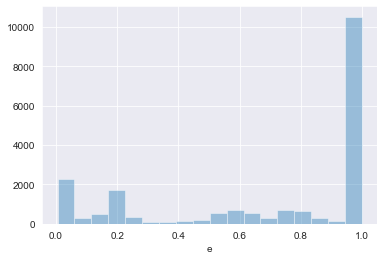

In [36]:
sns.distplot(data_result['e'],kde = False)

<AxesSubplot:xlabel='f'>

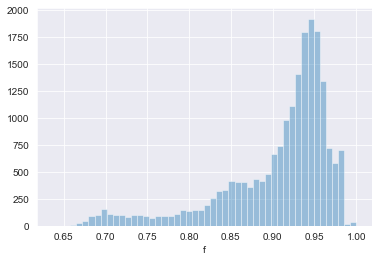

In [37]:
sns.distplot(data_result['f'],kde = False)

<AxesSubplot:xlabel='g'>

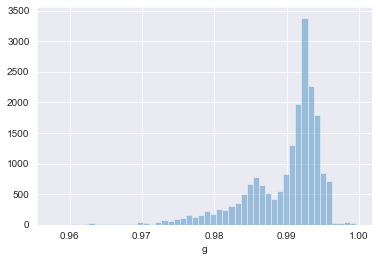

In [38]:
sns.distplot(data_result['g'],kde = False)

          a         b         c         d         e         f         g
a  1.000000  0.067892 -0.025479  0.117721 -0.064483  0.001587 -0.001647
b  0.067892  1.000000 -0.097448  0.223523  0.158300 -0.144146 -0.152511
c -0.025479 -0.097448  1.000000 -0.287105 -0.136449  0.169041  0.641954
d  0.117721  0.223523 -0.287105  1.000000 -0.075286 -0.505656 -0.572465
e -0.064483  0.158300 -0.136449 -0.075286  1.000000  0.158462  0.169319
f  0.001587 -0.144146  0.169041 -0.505656  0.158462  1.000000  0.589538
g -0.001647 -0.152511  0.641954 -0.572465  0.169319  0.589538  1.000000


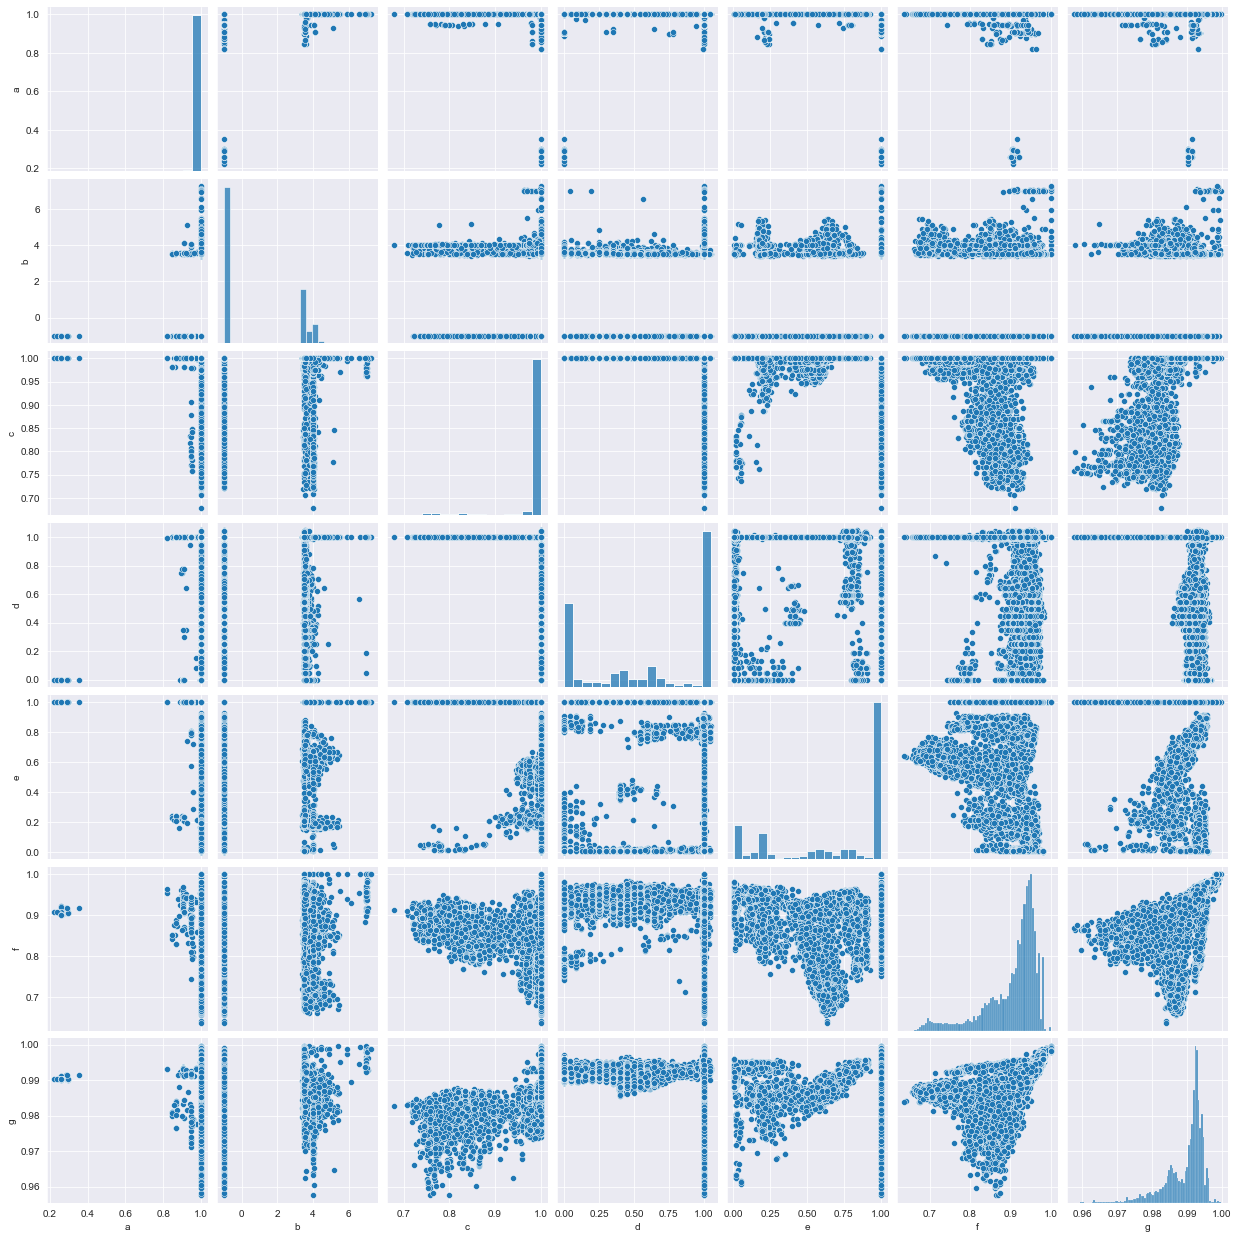

In [39]:
print(data_result.corr())
sns.pairplot(data_result)

<AxesSubplot:>

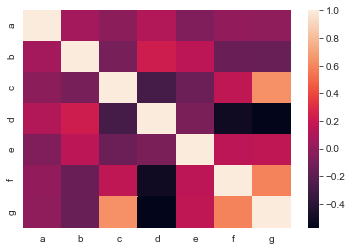

In [40]:
sns.heatmap(data_result.corr())

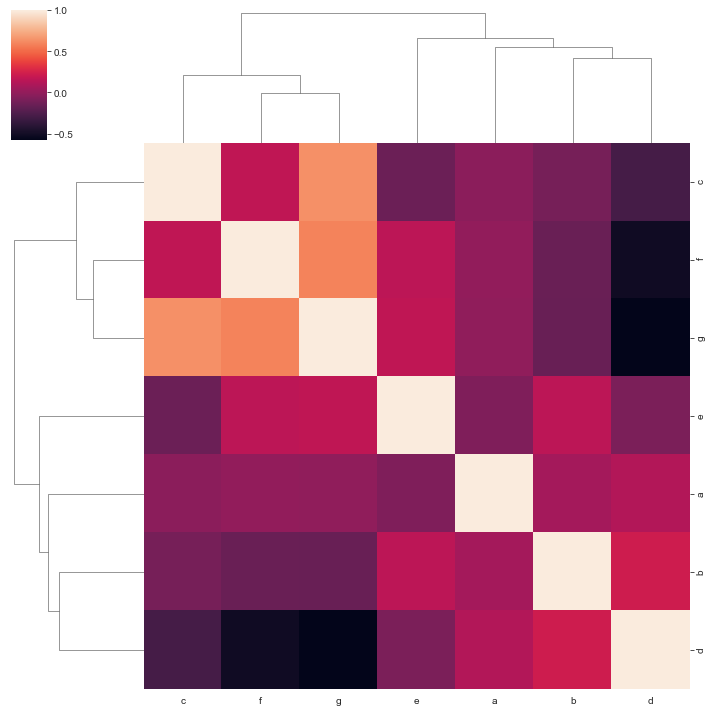

In [41]:
sns.clustermap(data_result.corr())

/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

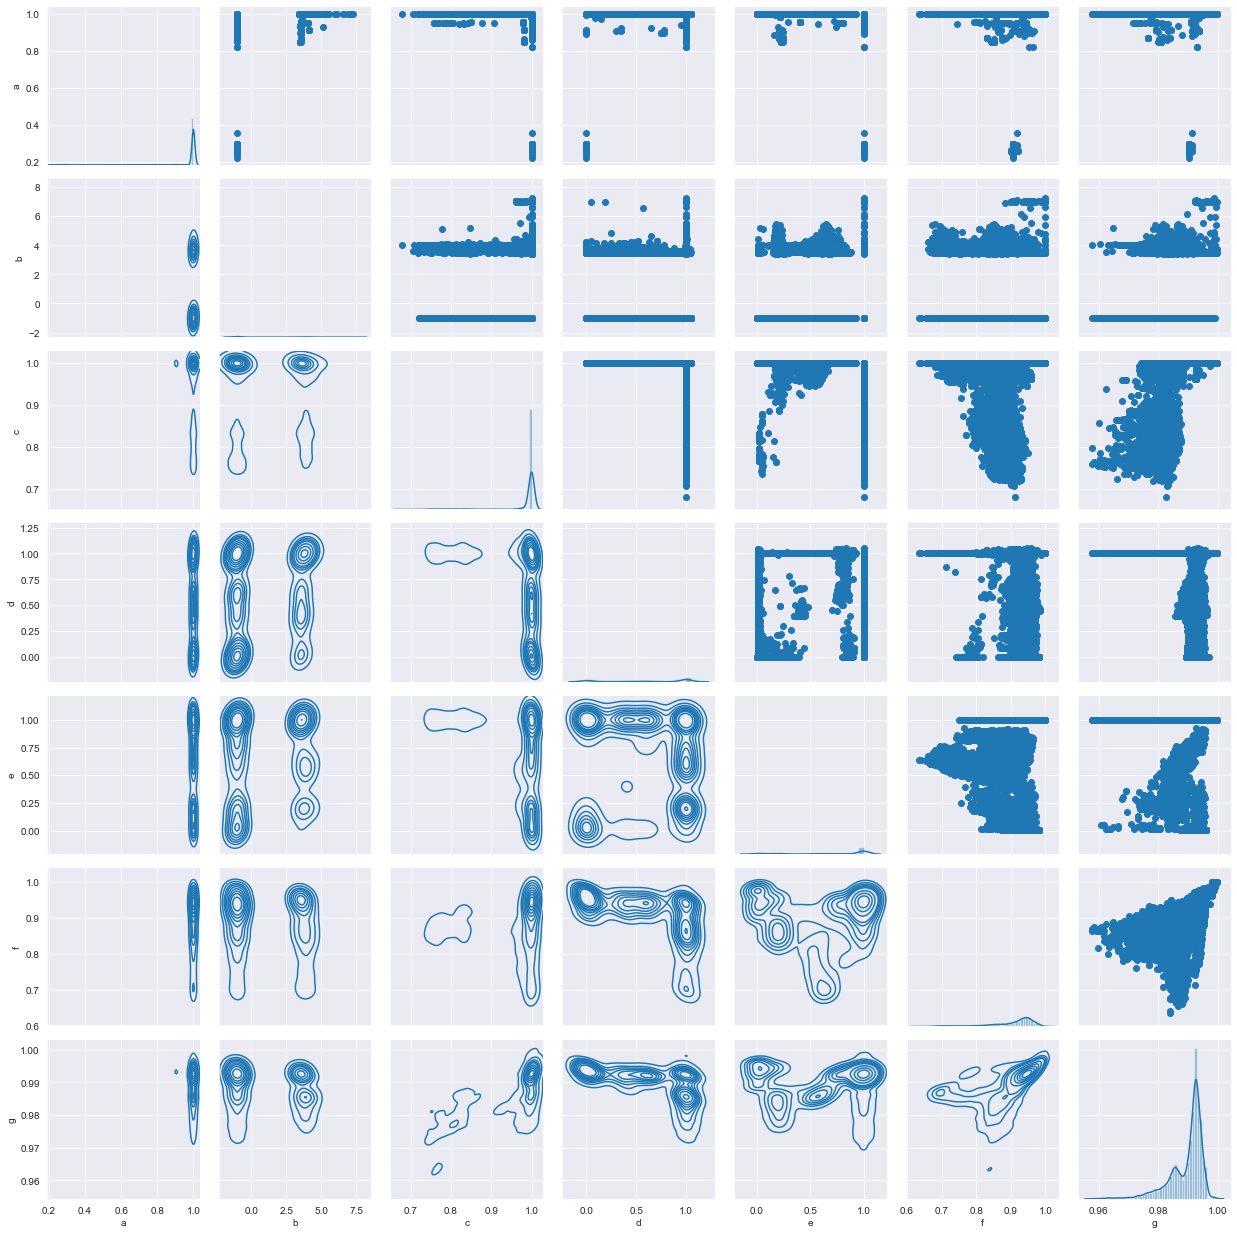

In [42]:
g = sns.PairGrid(data_result)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)